In [1]:
import openturns as ot
import openturns.viewer as viewer
from matplotlib import pylab as plt

## OpenTURNS hybrid fitting example

In [2]:
sample = ot.Sample.ImportFromCSVFile("WaveData_Example.csv",",")
sample_Hs = sample[:,0]
sample_Tp = sample[:,3]
sample_HT = sample[:,(0,3)]

In [3]:
# Maximum likelihood fit of marginal distributions with 3 parameter model
#########################################################################

# Use a package that gives a liklihood maximumization
factory_mle_wbl3_h = ot.MaximumLikelihoodFactory(ot.WeibullMin())
# Give bounds for the optimization
# 3.5556343 1.7025580 0.3997116
lowerBound=[1.0, 1.0, -1.0]
upperBound=[5.0, 3.0, 1.0]
bounds = ot.Interval(lowerBound, upperBound, [True,True,True], [True,True,True])
factory_mle_wbl3_h.setOptimizationBounds(bounds)
# Set the starting point for the optimization
solver = factory_mle_wbl3_h.getOptimizationAlgorithm()
solver.setStartingPoint([4.0,2.0,0.0])
# solve the distribution
fitted_Hs = factory_mle_wbl3_h.build(sample_Hs)
print(fitted_Hs)

WeibullMin(beta = 3.64635, alpha = 1.52392, gamma = 0.395226)


WRN - TNC went to an abnormal point x=[nan,nan,nan] y=[] msg=TNC got a nan input value


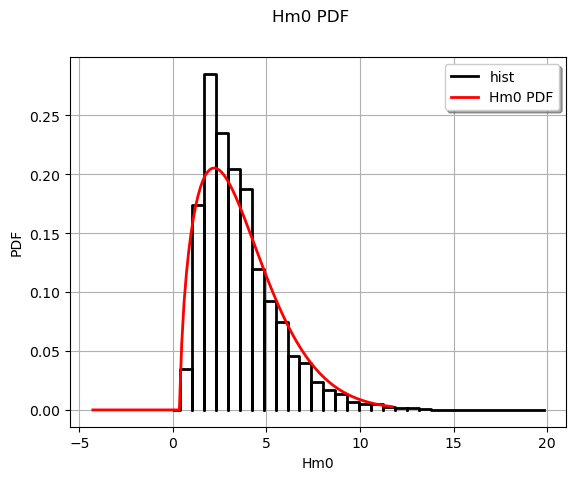

In [4]:
# Graph the results
graph = ot.HistogramFactory().build(sample_Hs, 30).drawPDF()
graph.setColors(["black"])
graph.setLegends(["hist"])

fitted_pdf = fitted_Hs.drawPDF()
graph.add(fitted_pdf)
view = viewer.View(graph)
plt.show()

In [5]:
factory = ot.MaximumLikelihoodFactory(ot.InverseNormal())
# Give bounds for the optimization
lowerBound=[7., 140.0]
upperBound=[8., 150.0]
bounds = ot.Interval(lowerBound, upperBound, [True,True], [True,True])
factory.setOptimizationBounds(bounds)
# Set the starting point for the optimization
solver = factory.getOptimizationAlgorithm()
solver.setStartingPoint([7.5, 145.])
# solve the distribution
fitted_Tp = factory.build(sample_Tp)
print(fitted_Tp)

WRN - Starting point is not inside bounds x=[1,1] bounds=class=Interval name=Unnamed dimension=2 lower bound=class=Point name=Unnamed dimension=2 values=[7,140] upper bound=class=Point name=Unnamed dimension=2 values=[8,150] finite lower bound=[1,1] finite upper bound=[1,1]


InverseNormal(mu = 7.35506, lambda = 143.88)


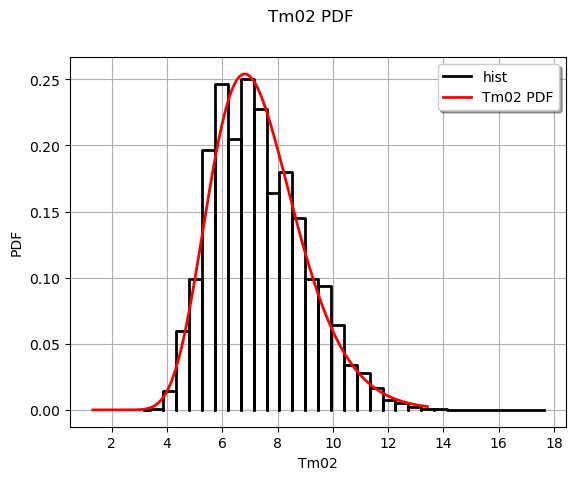

In [6]:
# Graph the results
graph = ot.HistogramFactory().build(sample_Tp, 30).drawPDF()
graph.setColors(["black"])
graph.setLegends(["hist"])

fitted_pdf = fitted_Tp.drawPDF()
graph.add(fitted_pdf)
view = viewer.View(graph)
plt.show()

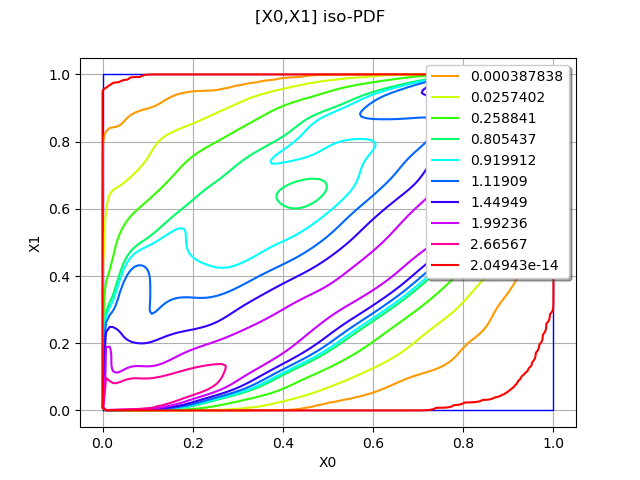

In [7]:
fitted_copula = ot.EmpiricalBernsteinCopula(sample_HT, 100, False)
fitted_copula.drawPDF()

In [8]:
fitted_joint = ot.ComposedDistribution([fitted_Hs, fitted_Tp], fitted_copula)

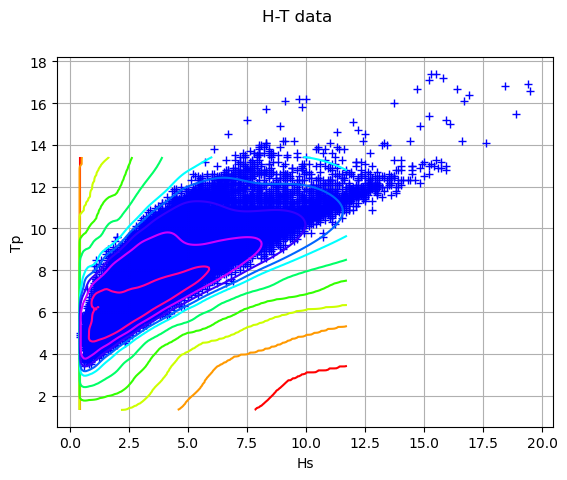

In [9]:
# Scatter plot
scatter_graph = ot.Graph("H-T data", "Hs", "Tp", True, "")
cloud = ot.Cloud(sample_HT)
scatter_graph.add(cloud)
scatter_graph.add(fitted_joint.drawPDF())
view = viewer.View(scatter_graph)

In [13]:
fake_data = fitted_joint.getSample(int(1e5))

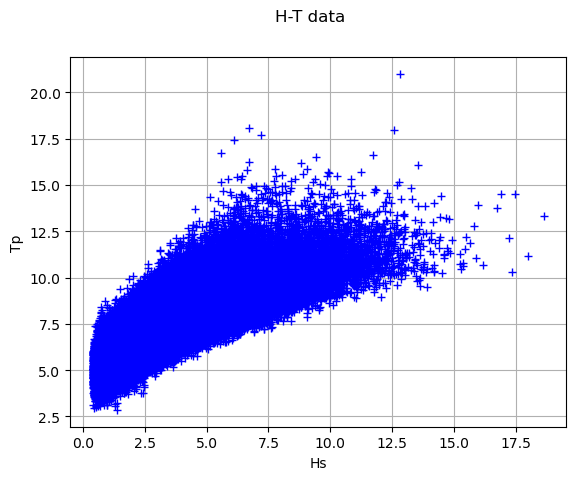

In [14]:
scatter_graph = ot.Graph("H-T data", "Hs", "Tp", True, "")
cloud = ot.Cloud(fake_data)
scatter_graph.add(cloud)
view = viewer.View(scatter_graph)